In [7]:
from numpy.fft  import fft
import numpy as np 
import math 
import scipy
import matplotlib.pyplot as plt

## Fourier Transform

FT decomposes a signal into frecuencies.

- Ampllitude of the signal.
- Frecuencies

How can I recover the original signal?

We move the plot it helps to make the transition from time to frequency domain.



## Signal generation and phase shift

A signal that is slightly 


If we want to describe as signla we need:
- Frecuency of the signal
- Amplitude
- Pha shift - Where the signal starts



The reduction of a continuous time signal to a discrete time signal is known as sampling


In [53]:
def gen_wave(freq, amp, T,shift, sr):
    """Generate a simple signal"""
    time = np.arange(0, T, T/sr)

    X = amp*np.sin(2*np.pi*freq*time+shift)

    return time, X

#### Plot the signals

Example in python about suming signals and ploting them in time. 

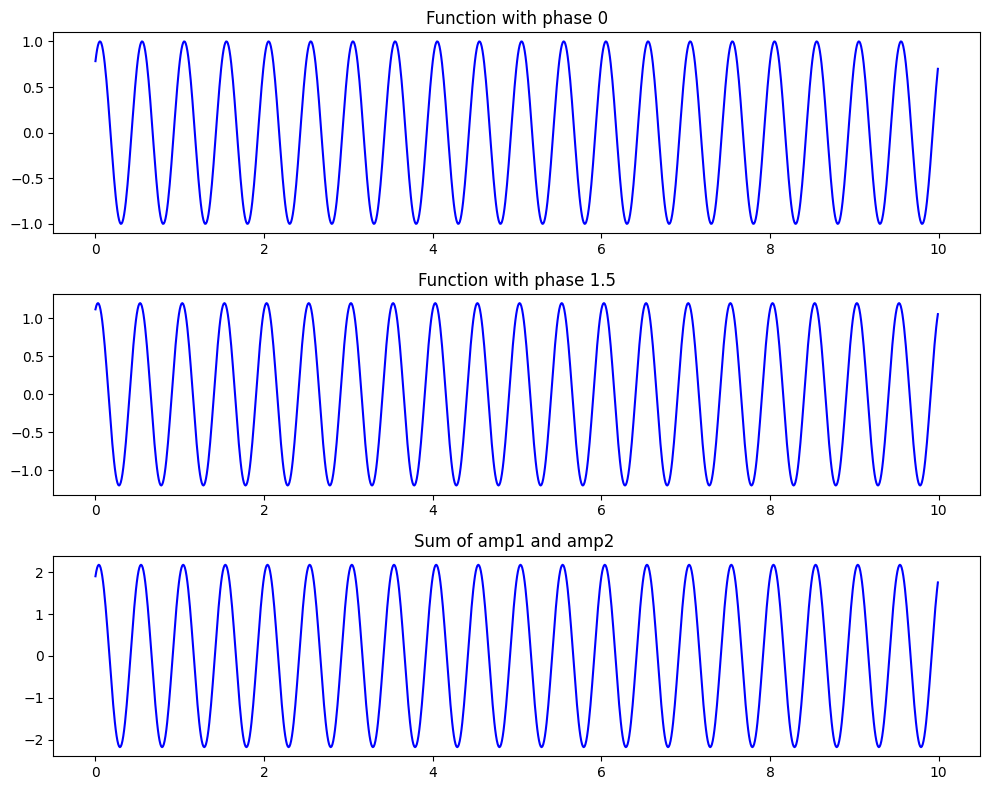

In [54]:
# Creating subplots using plt.subplots()
fig, axs = plt.subplots(3, 1, figsize=(10, 8))  # Creating a 2x2 grid of subplots

time, amplitude1 = gen_wave(2, 1, 10, 0.9, 1000)
# Plotting data on each subplot
axs[0].plot(time, amplitude1, c="b")
axs[0].set_title('Function with phase 0')

time, amplitude2 = gen_wave(2, 1.2, 10, 1.2, 1000)
# Plotting data on each subplot
axs[1].plot(time, amplitude2, c="b")
axs[1].set_title('Function with phase 1.5')

amplitude3 = amplitude1+amplitude2

# Sum of two signals. 
axs[2].plot(time, amplitude3, c="b")
axs[2].set_title('Sum of amp1 and amp2 ')

plt.tight_layout()
plt.show()

### The maths behind Fourier Transform

Any continuos signal in time domain can be represented uniquely and unambiguosly by an infinite series of sinusoids. 

1. How we implement FT?
    - WE have to write our own FT.
2. Deal with the complex numbers.
3. How to deal with discrete signals. 


#### Sampling a signal. 
Oversampling a singal is not a good represantion and with more data points we create a better represantion of the signal. 




In [55]:
def gen_wave(freq, amp, T, sr):
    """Generate a simple signal"""
    time = np.arange(0, T, T/sr)

    X = amp*np.sin(2*np.pi*freq*time)

    return time, X


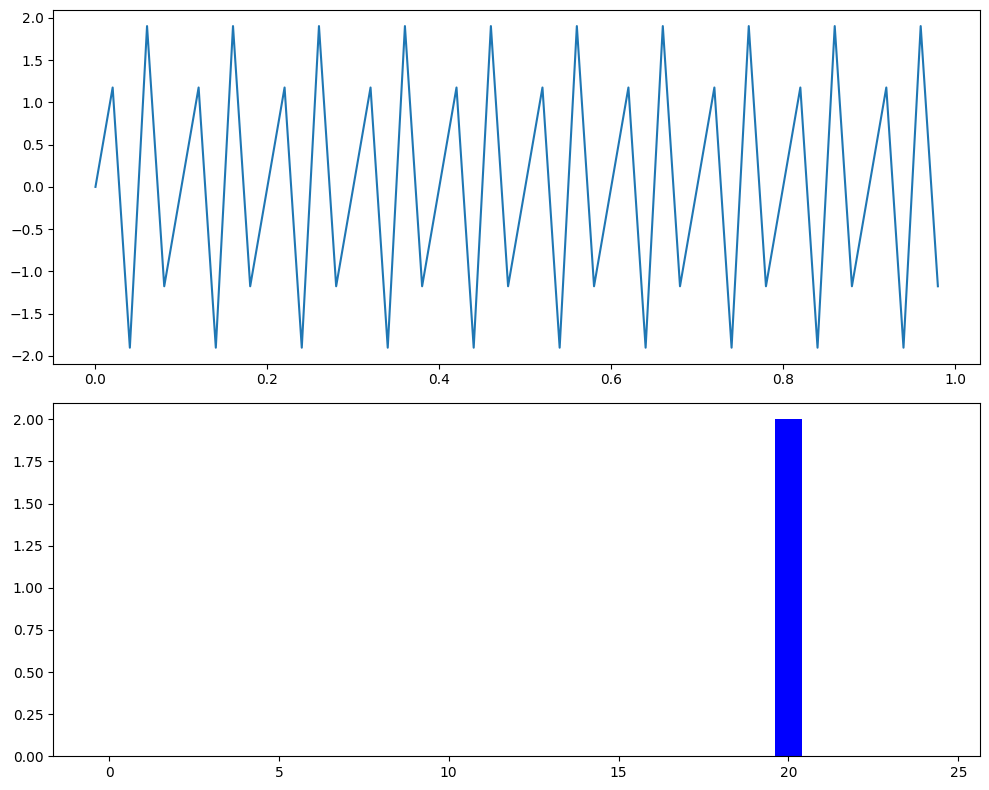

In [56]:
# Creating subplots using plt.subplots()
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # Creating a 2x2 grid of subplots

sr = 50 #in Hz

x, y = gen_wave(20, 2, 1, sr)

y = y

axs[0].plot(x, y)
# Plotting data on each subplot

n = len(y)
p = fft(y) #Fourier

#Calculate the magnitudes.
mag = np.sqrt(p.real**2 +p.imag**2)
mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]
x= np.arange(0, len(mag), 1.0) * (sr / n)


# Plotting the frequecnies en a bar plot. 
axs[1].bar(x, mag, color="b")
#axs[1].xaxis.set_ticks(np.arange(min(x), max(x+1, 1.0)))

plt.tight_layout()
plt.show()

### Euler formula

We apply the euler formula unto the FFT.

$$ e^(io) = cos(theta) + i*sin(theta)  $$

The result is the calculation of the coeeficients. 

## Fast Fourier Transform



DFT  -  time - $$ o(n^2) $$
FFT - quasi-linear time - $$ o(nlogn) $$

Breaks down the main computation from FT to optimize the algorithm. 

USe it for feature extraction, generate our own spectograms and magnitudes in order to apply an algorithm to clasiffy. 



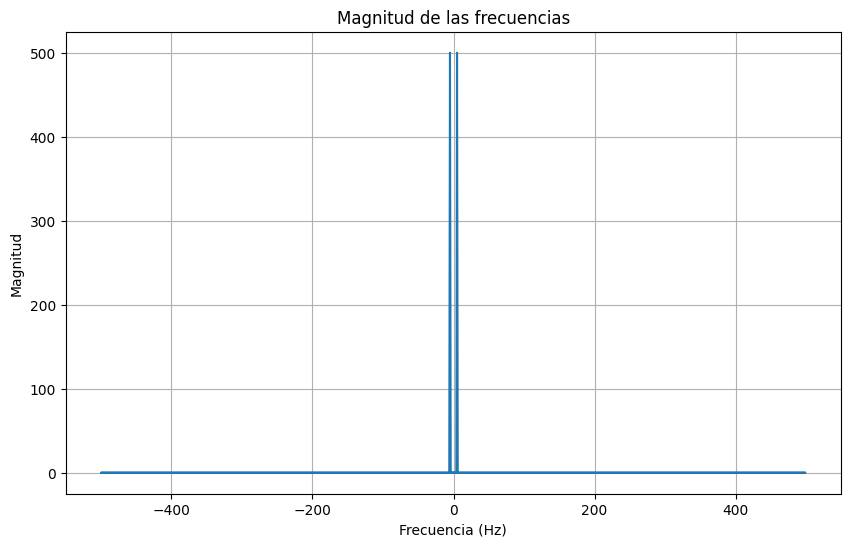

In [60]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Generar una señal de ejemplo
tiempo_inicio = 0
tiempo_fin = 1  # Segundos
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
tiempo = np.linspace(tiempo_inicio, tiempo_fin, (tiempo_fin - tiempo_inicio) * frecuencia_muestreo, endpoint=False)
frecuencia_señal = 5  # Hz
señal = np.sin(2 * np.pi * frecuencia_señal * tiempo)

# Realizar la transformada de Fourier
transformada = fft(señal)

# Calcular la magnitud de las frecuencias
magnitud = np.abs(transformada)

# Calcular las frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(magnitud), 1/frecuencia_muestreo)

# Graficar la magnitud de las frecuencias
plt.figure(figsize=(10, 6))
plt.plot(frecuencias, np.abs(magnitud))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Magnitud de las frecuencias')
plt.grid(True)
plt.show()


## Clase FFT

In [255]:
class FFTProcessor:
    """
    Clase que engloba funciones para el procesamiento de señales en el dominio de la frecuencia.

    NOTA: Se recomienda realizar un muestreo de la señal para obtener la cantidad de muestras por segundo.

    Atributos:
        - frecuencia_muestreo (int): Tasa de muestreo o cantidad de muestras tomadas por unidad de tiempo.
        - fft_result (np.ndarray): Resultado de la transformada de Fourier.
        - frecuencias (np.ndarray): Frecuencias asociadas a la FFT.
        - magnitud (np.ndarray): Magnitud de la FFT.

    Métodos:
        - __init__(self, frecuencia_muestreo=10):
            Inicializa la clase `FFTProcessor`.

        - signal_fft(self, x_tiempo, y_señal):
            Calcula la transformada de Fourier de una señal en el dominio del tiempo.

        - dataframe_fft(self, dataframe):
            Calcula la transformada de Fourier de un dataframe de señales.

        - grafica_variable(self, x_tiempo, y_señal, fft, frecuencias, magnitud, frecuencia_muestreo):
            Genera una gráfica con la señal original, la FFT y el espectro de magnitud de frecuencias.

        - grafica_fft(self, frecuencias, fft_calculada, title: str, axs=None):
            Grafica la transformada de Fourier.

        - low_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float, filter_type='FIR') -> np.ndarray:
            Aplica un filtro pasabajos a la FFT para retener componentes de frecuencias por debajo de la frecuencia de corte.

        - high_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float) -> np.ndarray:
            Aplica un filtro pasa altos a la FFT para retener componentes de frecuencias por encima de la frecuencia de corte.

        - inverse_transform(self, fft_calculated: np.ndarray) -> np.ndarray:
            Realiza una transformada inversa de la FFT para obtener la señal en el dominio del tiempo.
          
        """
    def __init__(self, frecuencia_muestreo=100):
        """
        Inicializa la clase FFTProcessor con la frecuencia de muestreo dada.
        """
        # Crea los atributos para la clase
        self.frecuencia_muestreo = frecuencia_muestreo
        self.fft_result = None
        self.frequencias = None
        self.magnitud = None

    def signal_fft(self, x_tiempo, y_señal):
        """
        Calcula la Transformada de Fourier de una señal en el dominio del tiempo.
        Devuelve la FFT, frecuencias y magnitud de la señal.
        """
        # Calcula la FFT de la señal y las frecuencias asociadas
        self.fft_result = scipy.fft.fft(y_señal)
        self.frequencias = scipy.fftpack.fftfreq(len(y_señal), 1 / self.frecuencia_muestreo)
        self.magnitud = np.abs(self.fft_result)
        # Grafica la señal original y su FFT
        self.grafica_variable(x_tiempo=x_tiempo, y_señal=y_señal, fft=self.fft_result,
                            frecuencias=self.frequencias, magnitud=self.magnitud,
                            frecuencia_muestreo=self.frecuencia_muestreo)
        return self.fft_result, self.frequencias, self.magnitud

    def dataframe_fft(self, dataframe):
        """
        Calcula la Transformada de Fourier de un dataframe de señales.
        Grafica la magnitud de la FFT para cada variable del dataframe.
        """
        # Crea un diccionario para almacenar los resultados de la FFT
        self.fft_results = {}
        for col in dataframe.columns:
            y = dataframe[col].values
            # Calcula la FFT para cada columna del dataframe
            fft_result = scipy.fft.fft(np.abs(y))
            frecuencias = scipy.fft.fftfreq(len(y), 1 / self.frecuencia_muestreo)
            magnitud = np.abs(fft_result)
            # Almacena los resultados en el diccionario
            self.fft_results[col] = {'señal_original': y, 'fft_result': fft_result,
                                    'frecuencias': frecuencias, 'magnitud': magnitud}
        # Grafica la magnitud de la FFT para cada variable del dataframe
        for col, data in self.fft_results.items():
            time = np.linspace(0, (len(data['magnitud']) - 1) * 0.1, len(data['magnitud']))
            self.grafica_variable(x_tiempo=time, y_señal=data['señal_original'],
                                fft=data['fft_result'], frecuencias=data['frecuencias'],
                                magnitud=data['magnitud'], frecuencia_muestreo=self.frecuencia_muestreo)

    def grafica_variable(self, x_tiempo, y_señal, fft, frecuencias, magnitud, frecuencia_muestreo):
        """
        Grafica la señal original, su FFT y el espectro de magnitud de frecuencias.
        """
        # Crea una gráfica con subplots para la señal original, la FFT y el espectro de magnitud
        self.fig, self.axs = plt.subplots(3, 1)

        # Grafica la señal original en el primer subplot
        self.axs[0].plot(x_tiempo, y_señal)
        self.axs[0].set_title('Señal original')
        self.axs[0].set_xlabel('Tiempo')
        self.axs[0].set_ylabel('Amplitud')
        self.axs[0].grid(True)

        # Grafica la FFT en el segundo subplot
        self.axs[1].plot(frecuencias[:len(frecuencias)//2], np.abs(fft)[:len(frecuencias)//2])
        self.axs[1].set_title('Transformada de Fourier (FFT)')
        self.axs[1].set_xlabel('Frecuencia (Hz)')
        self.axs[1].set_ylabel('Amplitud')
        self.axs[1].grid(True)

        # Grafica el espectro de magnitud de frecuencias en el tercer subplot
        self.axs[2].bar(frecuencias[:len(frecuencias)//2], magnitud[:len(frecuencias)//2])
        self.axs[2].set_title('Espectro de magnitud de frecuencias')
        self.axs[2].set_xlabel('Frecuencia (Hz)')
        self.axs[2].set_ylabel('Magnitud')
        self.axs[2].grid(True)

        # Ajusta la disposición y muestra la gráfica
        plt.tight_layout()
        plt.show()

    
    def grafica_fft(self, frecuencias, fft_calculada, title: str, axs=None):
        """
        Grafica la Transformada de Fourier (FFT) de una señal.
        
        Args:
            frecuencias (array): Array de frecuencias.
            fft_calculada (array): FFT calculada de la señal.
            title (str): Título para la gráfica.
            axs (matplotlib.axes.Axes, optional): Eje sobre el cual se graficará. Predeterminado: None.
        """
        # Grafica la FFT de la señal en el eje dado
        axs.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_calculada)[:len(frecuencias)//2])
        axs.set_title(f'Transformada de Fourier (FFT) {title}')
        axs.set_xlabel('Frecuencia (Hz)')
        axs.set_ylabel('Amplitud')
        axs.grid(True)
        plt.tight_layout()


    def low_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float, filter_type='FIR') -> np.ndarray:
        """
        Aplica un filtro pasabajos a una FFT.

        Args:
            fft_calculated (np.ndarray): FFT de la señal.
            cutoff_freq (float): Frecuencia de corte del filtro.
            filter_type (str): Tipo de filtro a aplicar. Opciones: 'FIR', 'butterworth', etc.

        Returns:
            np.ndarray: Señal filtrada después de aplicar el filtro pasabajos.
        """
        if filter_type == 'FIR':
            # Implementa un filtro FIR
            num_taps = 101  # Ajustar según sea necesario
            fir_coeff = scipy.signal.firwin(num_taps, cutoff_freq, fs=self.frecuencia_muestreo)
            filtered_signal = scipy.signal.lfilter(fir_coeff, 1.0, fft_calculated)
        elif filter_type == 'butterworth':
            # Implementa un filtro Butterworth
            order = 4  # Orden del filtro (modificar según sea necesario)
            b, a = scipy.signal.butter(order, cutoff_freq, fs=self.frecuencia_muestreo)
            filtered_signal = scipy.signal.lfilter(b, a, fft_calculated)
        else:
            raise ValueError("Tipo de filtro inválido. Elija entre 'FIR', 'butterworth', etc.")

        return filtered_signal


    def high_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float) -> np.ndarray:
        """
        Aplica un filtro pasa altos a una FFT.

        Args:
            fft_calculated (np.ndarray): FFT de la señal.
            cutoff_freq (float): Frecuencia de corte del filtro.

        Returns:
            np.ndarray: Señal filtrada después de aplicar el filtro pasa altos.
        """
        if cutoff_freq > 0:
            filtered_signal = fft_calculated * (np.abs(self.frequencias) > cutoff_freq)
        else:
            filtered_signal = fft_calculated
            
        return filtered_signal


    def inverse_transform(self, fft_calculated: np.ndarray) -> np.ndarray:
        """
        Realiza una transformación inversa sobre una FFT para obtener la señal en el dominio del tiempo.

        Args:
            fft_calculated (np.ndarray): FFT de la señal.

        Returns:
            np.ndarray: Señal en el dominio del tiempo después de realizar la transformación inversa.
        """
        if self.fft_result is None:
            raise ValueError("No hay resultado de FFT disponible para realizar la transformación inversa.")
        
        inverse_signal = scipy.fft.ifft(fft_calculated)
        return inverse_signal.real  # Toma la parte real ya que la inversa puede tener una parte imaginaria despreciable


In [256]:
%matplotlib inline

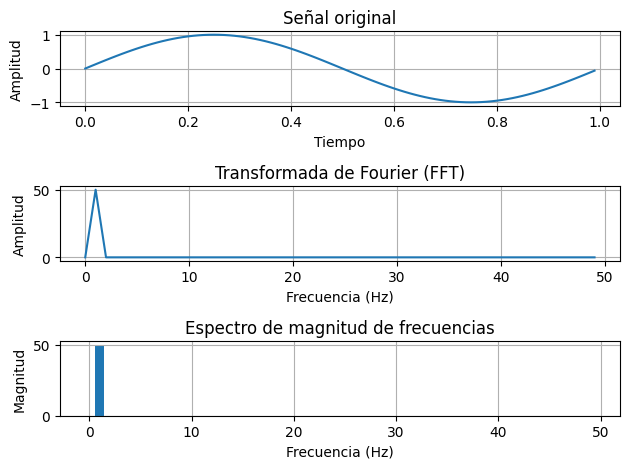

In [257]:
def gen_wave(freq, amp, T, sr):
    """Generate a simple signal"""
    time = np.arange(0, T, T/sr)

    X = amp*np.sin(2*np.pi*freq*time)

    return time, X


sr = 100 #in Hz

x, y = gen_wave(1, 1, 1, sr)

señal = FFTProcessor()

resultado_fft, frequencias, magnitud = señal.signal_fft(x_tiempo=x, y_señal=y)

#### Aplicacion de filtros pasabajos y pasaltos. 

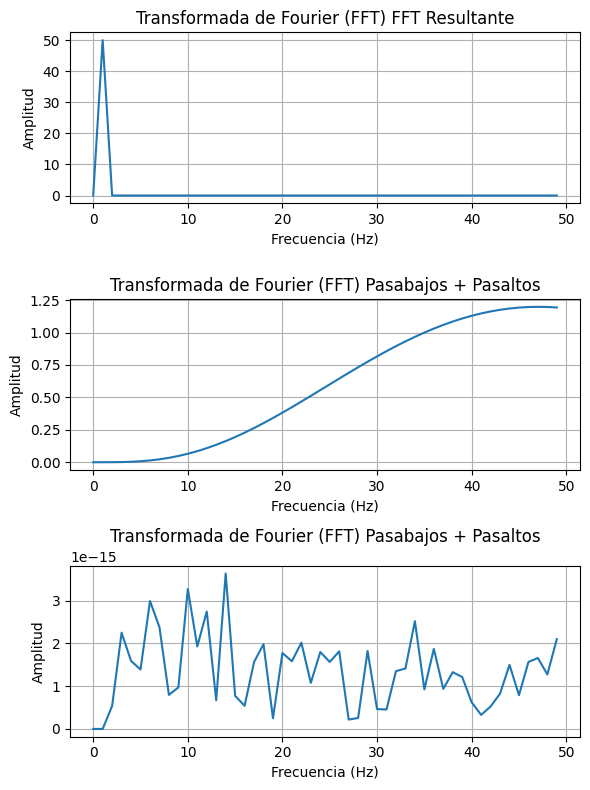

In [258]:
# Creación de subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Graficar la FFT inicial
señal.grafica_fft(frecuencias=frequencias, fft_calculada=resultado_fft, title='FFT Resultante', axs=axs[0])

# Aplicación del filtro pasabajos
low_filtered_fft = señal.low_pass_filter(fft_calculated=resultado_fft, cutoff_freq=1, filter_type='butterworth')
# Aplicación del filtro pasaltos
high_filtered_fft = señal.high_pass_filter(fft_calculated=resultado_fft, cutoff_freq=1)

# Graficar FFT pasabajos y pasaltos juntas en un solo subplot
señal.grafica_fft(frecuencias=frequencias, fft_calculada=low_filtered_fft, title='Pasabajos + Pasaltos', axs=axs[1])
señal.grafica_fft(frecuencias=frequencias, fft_calculada=high_filtered_fft, title='Pasabajos + Pasaltos', axs=axs[2])

plt.tight_layout()
plt.show()

#### Aplicacion inversa para obtener los datos de partida.

In [259]:
señal_inversa = señal.inverse_transform(low_filtered_fft)

#### Comparacion de señal original vs señal filtrada

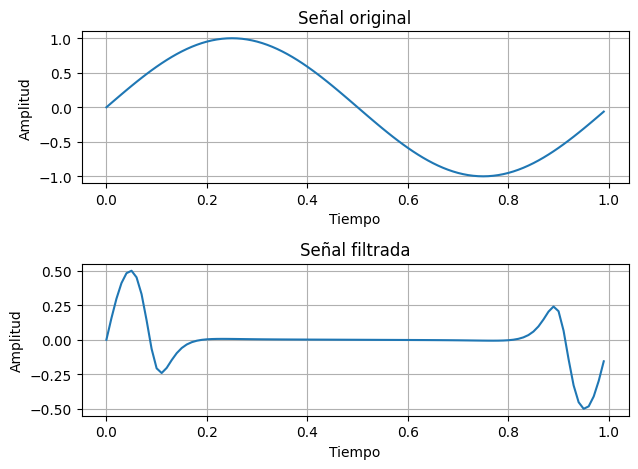

In [254]:
# subplot.
fig, axs = plt.subplots(2, 1)

# Señal original    
axs[0].plot(x, y)
axs[0].set_title('Señal original')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)



# Señalfiltrada  
axs[1].plot(x, señal_inversa)
axs[1].set_title('Señal filtrada')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)
plt.tight_layout()
plt.show()

In [260]:
señal_inversa

array([-5.80250679e-18,  3.64754702e-02, -8.96144233e-03,  6.81450166e-03,
        6.60238313e-03,  5.47202384e-03,  4.55149629e-03,  3.86281725e-03,
        3.34153642e-03,  2.93644974e-03,  2.61329955e-03,  2.34947473e-03,
        2.12976378e-03,  1.94365975e-03,  1.78370975e-03,  1.64449528e-03,
        1.52198835e-03,  1.41313472e-03,  1.31557723e-03,  1.22746785e-03,
        1.14733714e-03,  1.07400177e-03,  1.00649786e-03,  9.44032030e-04,
        8.85945022e-04,  8.31684201e-04,  7.80782558e-04,  7.32842461e-04,
        6.87522961e-04,  6.44529769e-04,  6.03607268e-04,  5.64532095e-04,
        5.27107943e-04,  4.91161308e-04,  4.56538003e-04,  4.23100263e-04,
        3.90724327e-04,  3.59298421e-04,  3.28721035e-04,  2.98899477e-04,
        2.69748617e-04,  2.41189810e-04,  2.13149967e-04,  1.85560724e-04,
        1.58357724e-04,  1.31479966e-04,  1.04869221e-04,  7.84694986e-05,
        5.22265545e-05,  2.60874275e-05,  8.32667268e-19, -2.60874275e-05,
       -5.22265545e-05, -